In [380]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [316]:
df3 = pd.read_csv('../../data/processed.csv')

In [317]:
df3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,alc-citr
count,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000
mean,7.214747,0.339582,0.318654,5.432562,0.056037,30.384443,115.453592,0.994688,3.218438,0.531244,10.492157,5.821153,1.246531,10.491968,5.818514,5.706767,0.577196
std,1.296742,0.164540,0.145366,4.697102,0.035059,17.182716,56.036163,0.002948,0.160726,0.148858,1.193207,0.870358,0.431024,0.558676,0.268017,0.005088,0.336707
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000,8.500000,4.000000,5.697872,0.121500
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,10.255556,5.709677,5.709677,0.404200
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,10.672460,5.812834,5.709677,0.479700
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,155.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,10.788827,5.917647,5.709677,0.662100
max,15.900000,1.580000,1.660000,31.600000,0.611000,118.500000,294.000000,1.010300,4.010000,2.000000,14.900000,9.000000,2.000000,13.400000,8.000000,5.709677,5.743400


In [336]:
df3[df3['total sulfur dioxide'] < 7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,alc-citr
5802,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6,2,10.672460,5.812834,5.697872,0.9401
5866,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,2,10.653881,5.863014,5.697872,0.7800
5871,12.2,0.450,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,2,10.653881,5.863014,5.697872,0.7800


In [61]:
test = pd.read_csv('../../data/test.csv')
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,alc-citr
0,6.6,0.26,0.38,6.5,0.170,68.0,201.0,0.99560,3.19,0.38,9.400000,6,1,10.773077,5.884615,5.709677,1.598000
1,6.0,0.19,0.29,1.2,0.046,29.0,92.0,0.99033,3.22,0.53,11.300000,6,1,10.885043,5.794872,5.709677,0.519800
2,6.3,0.41,0.33,4.7,0.023,28.0,110.0,0.99100,3.30,0.38,12.500000,7,1,11.393333,6.400000,5.709677,0.287500
3,7.6,0.31,0.24,1.8,0.037,39.0,150.0,0.99130,3.05,0.44,11.800000,7,1,10.697807,5.837719,5.709677,0.436600
4,7.7,0.29,0.29,4.8,0.060,27.0,156.0,0.99572,3.49,0.59,10.300000,6,1,10.770732,5.926829,5.709677,0.618000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,6.0,0.26,0.18,7.0,0.055,50.0,194.0,0.99591,3.21,0.43,9.000000,5,1,10.487500,5.656250,5.709677,0.495000
1294,10.5,0.28,0.51,1.7,0.080,10.0,24.0,0.99820,3.20,0.89,9.400000,6,2,10.739429,5.885714,5.697872,0.752000
1295,6.2,0.37,0.30,6.6,0.346,79.0,200.0,0.99540,3.29,0.58,9.600000,5,1,10.342187,5.718750,5.709677,3.321600
1296,7.1,0.23,0.23,3.5,0.038,23.0,112.0,0.99157,3.05,0.37,11.366667,6,1,11.156566,5.939394,5.709677,0.431933


In [381]:
train = pd.read_csv('../../data/train.csv')
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,alc-citr
0,7.9,0.16,0.30,4.8,0.037,37.0,171.0,0.99670,3.47,0.44,9.000000,4,1,10.770732,5.926829,5.709677,0.333000
1,7.5,0.30,0.71,1.3,0.160,44.0,149.0,0.99480,3.08,0.42,8.900000,5,1,10.678399,5.723684,5.709677,1.424000
2,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.100000,5,1,10.142333,5.900000,5.709677,0.627900
3,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.200000,6,2,10.697807,5.837719,5.697872,0.828800
4,8.9,0.13,0.49,1.0,0.028,6.0,24.0,0.99260,2.91,0.32,9.900000,5,1,10.850000,5.709677,5.709677,0.277200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5183,8.2,0.32,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.300000,6,2,10.717219,5.788079,5.697872,1.205400
5184,8.6,0.22,0.33,1.2,0.031,38.0,95.0,0.99239,2.83,0.31,10.300000,5,1,10.885043,5.794872,5.709677,0.319300
5185,6.1,0.22,0.49,1.5,0.051,18.0,87.0,0.99280,3.30,0.46,9.600000,5,1,10.707558,5.854651,5.709677,0.489600
5186,6.5,0.13,0.27,2.6,0.035,32.0,76.0,0.99140,3.21,0.76,11.333333,6,1,10.687202,5.750000,5.709677,0.396667


In [382]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=20)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

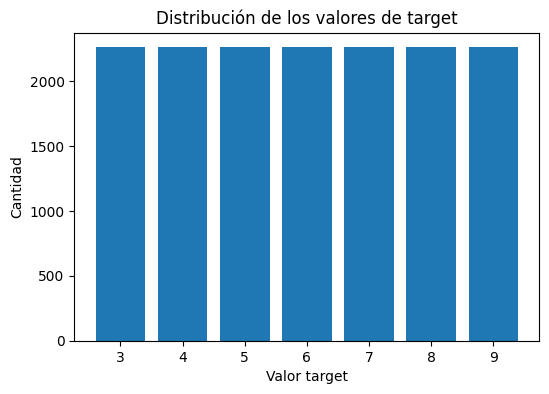

In [387]:
plt.figure(figsize=(6, 4))
plt.bar(y_resampled.value_counts().index,y_resampled.value_counts())
plt.xlabel('Valor target')
plt.ylabel('Cantidad')
plt.title('Distribución de los valores de target')
plt.show()

In [341]:
from sklearn.ensemble import GradientBoostingRegressor
pipe2 = Pipeline([
    ('scaler', StandardScaler()),  
    ('gb', GradientBoostingRegressor())  
])

param2 = {
    'scaler' : [None, StandardScaler()],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.1, 0.2, 0.5, 1],
    'gb__max_depth': [3, 4, 5]
}

gb_gs = GridSearchCV(pipe2, param2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

gb_gs.fit(X_resampled, y_resampled)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gb', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': [0.1, 0.2, 0.5, 1],
                         'gb__max_depth': [3, 4, 5],
                         'gb__n_estimators': [50, 100, 200],
                         'scaler': [None, StandardScaler()]},
             scoring='neg_mean_absolute_error')

In [342]:
best_model2 = gb_gs.best_estimator_

In [343]:
best_model2

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingRegressor(learning_rate=1, max_depth=5,
                                           n_estimators=200))])

In [345]:
y_pred = best_model2.predict(X_resampled)

mae = mean_absolute_error(y_resampled, y_pred)
mape = np.mean(np.abs((y_resampled - y_pred) / y_resampled)) * 100
mse = mean_squared_error(y_resampled, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.03446873034688658
Mean Absolute Percentage Error (MAPE): 0.6083757812717366%
Mean Squared Error (MSE): 0.006143698181908293
Root Mean Squared Error (RMSE): 0.07838174648416743


In [371]:
test= pd.read_csv('../../data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1298 non-null   float64
 1   volatile acidity      1298 non-null   float64
 2   citric acid           1298 non-null   float64
 3   residual sugar        1298 non-null   float64
 4   chlorides             1298 non-null   float64
 5   free sulfur dioxide   1298 non-null   float64
 6   total sulfur dioxide  1298 non-null   float64
 7   density               1298 non-null   float64
 8   pH                    1298 non-null   float64
 9   sulphates             1298 non-null   float64
 10  alcohol               1298 non-null   float64
 11  quality               1298 non-null   int64  
 12  type_num              1298 non-null   int64  
 13  alc-sug               1298 non-null   float64
 14  qua-sug               1298 non-null   float64
 15  aci-type             

In [379]:
X = test.drop(columns='quality')
y = test['quality']



y_pred2 = best_model2.predict(X)

mae = mean_absolute_error(y, y_pred2)
mape = np.mean(np.abs((y - y_pred2) / y)) * 100
mse = mean_squared_error(y, y_pred2)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.17550717026216078
Mean Absolute Percentage Error (MAPE): 3.1245780256243356%
Mean Squared Error (MSE): 0.17568190624153354
Root Mean Squared Error (RMSE): 0.4191442546922641


In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', GradientBoostingClassifier())  
])

param_grid = {
    'classifier__n_estimators': [ 100,150,200],
    'classifier__learning_rate': [0.1,0.2,0.5,1],
    'classifier__max_depth': [2,3,5],
    
}

gb = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

gb.fit(X_resampled, y_resampled)

KeyboardInterrupt: 

In [31]:
best_model2.fit(X_resampled,y_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingRegressor(learning_rate=1, max_depth=5,
                                           n_estimators=200))])

In [32]:
y_pred2 = best_model2.predict(X_resampled)

In [373]:
y_pred = best_model2.predict(X)

mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.17550717026216078
Mean Absolute Percentage Error (MAPE): 3.1245780256243356%
Mean Squared Error (MSE): 0.17568190624153354
Root Mean Squared Error (RMSE): 0.4191442546922641


In [33]:
mae = mean_absolute_error(y_resampled, y_pred2)
mape = np.mean(np.abs((y_resampled - y_pred2) / y_resampled)) * 100
mse = mean_squared_error(y_resampled, y_pred2)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.033764749503538714
Mean Absolute Percentage Error (MAPE): 0.596757944854456%
Mean Squared Error (MSE): 0.005749825981465446
Root Mean Squared Error (RMSE): 0.07582760698759684


In [372]:
X = test.drop(columns='quality')
y = test['quality']



y_pred = best_model2.predict(X)

mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.17550717026216078
Mean Absolute Percentage Error (MAPE): 3.1245780256243356%
Mean Squared Error (MSE): 0.17568190624153354
Root Mean Squared Error (RMSE): 0.4191442546922641


In [21]:
X = test.drop(columns='quality')
y = test['quality']

scaler = best_model2.named_steps['scaler']

# Estandarizar las características del conjunto de prueba
X_scaled_test = scaler.transform(X)

# Realizar predicciones en el conjunto de prueba original
y_pred_test = best_model2.predict(X_scaled_test)

# Calcular métricas para el conjunto de prueba original
mae_test = mean_absolute_error(y, y_pred_test)
mape_test = np.mean(np.abs((y - y_pred_test) / y)) * 100
mse_test = mean_squared_error(y, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f'MAE en conjunto de prueba original: {mae_test}')
print(f'MAPE en conjunto de prueba original: {mape_test}%')
print(f'MSE en conjunto de prueba original: {mse_test}')
print(f'RMSE en conjunto de prueba original: {rmse_test}')

MAE en conjunto de prueba original: 2.1077738729813102
MAPE en conjunto de prueba original: 38.7344540275898%
MSE en conjunto de prueba original: 6.274657080522773
RMSE en conjunto de prueba original: 2.5049265619021193


c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [349]:
# Cargamos el dataframe procesado
df2= pd.read_csv('../../data/processed.csv')

In [350]:
df2['quality'] = df2['quality'].replace({3: 4, 9: 8})

In [351]:
from sklearn.model_selection import train_test_split
#Separamos el dataframe en train y test y lo guardamos en .csv
train, test = train_test_split(df2, test_size=0.2, random_state=25)

In [352]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,alc-citr
count,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000,5188.000000
mean,7.207999,0.339928,0.317377,5.435833,0.056029,30.423670,115.291153,0.994673,3.219948,0.531536,10.508484,5.829800,1.246916,10.492577,5.822142,5.706763,0.577998
std,1.286568,0.164580,0.144745,4.716886,0.035600,17.213805,55.958723,0.002960,0.163059,0.150255,1.201587,0.862731,0.431259,0.562574,0.271736,0.005091,0.342903
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,4.000000,1.000000,8.500000,4.000000,5.697872,0.121500
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992300,3.110000,0.430000,9.500000,5.000000,1.000000,10.258244,5.709677,5.709677,0.404600
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.505000,10.300000,6.000000,1.000000,10.672460,5.812834,5.709677,0.479600
75%,7.700000,0.410000,0.390000,8.100000,0.064250,41.000000,155.000000,0.996990,3.320000,0.600000,11.400000,6.000000,1.000000,10.788827,5.917647,5.709677,0.659000
max,15.600000,1.580000,1.230000,31.600000,0.611000,118.500000,294.000000,1.010300,4.010000,2.000000,14.200000,8.000000,2.000000,13.400000,8.000000,5.709677,5.743400


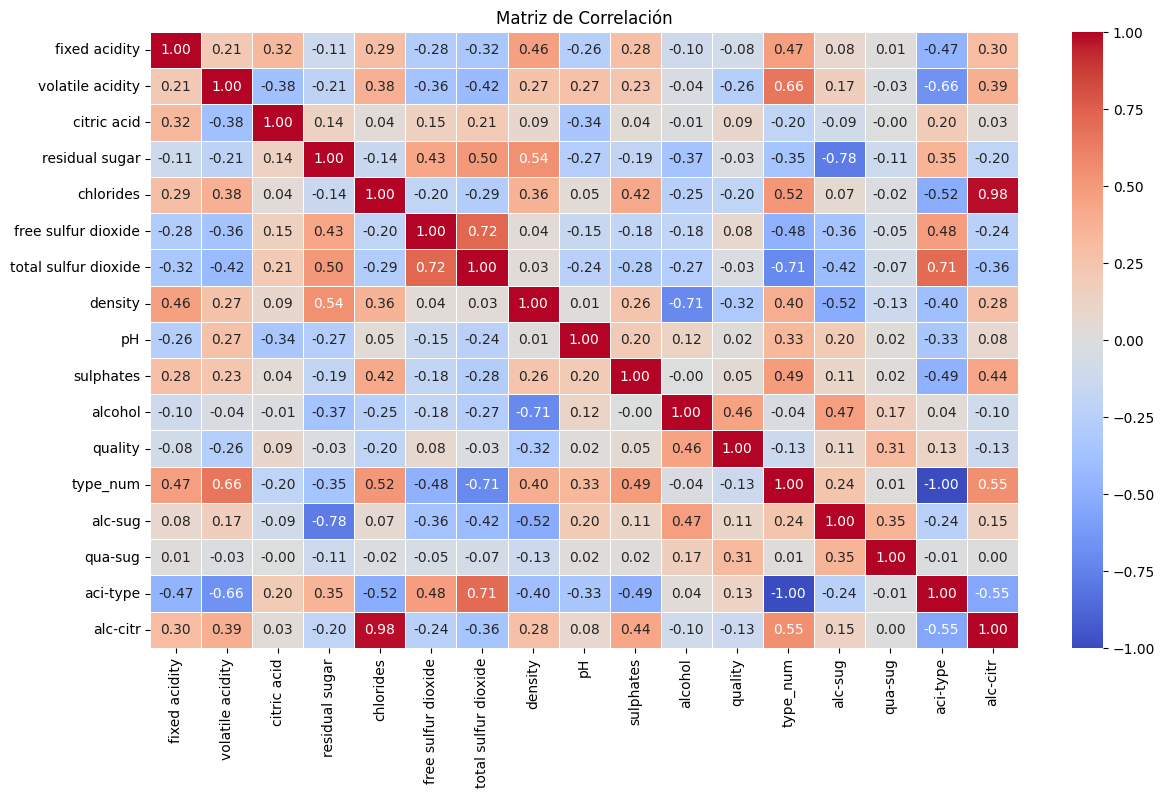

In [353]:
plt.figure(figsize=(14, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [354]:
test['quality'].value_counts()

quality
6    560
5    451
7    215
4     41
8     31
Name: count, dtype: int64

In [355]:
train['quality'].value_counts()

quality
6    2275
5    1683
7     864
4     199
8     167
Name: count, dtype: int64

In [252]:
from imblearn.over_sampling import RandomOverSampler

# Definir las columnas que se excluirán del equilibrio
exclude_columns = ['quality']

# Seleccionar solo las columnas que se usarán para el equilibrio
X_balancing = train.drop(columns=exclude_columns)

# Definir la variable objetivo
y_balancing = train['quality']

# Crear un diccionario con la proporción deseada para cada clase
# Puedes ajustar estos valores según tus necesidades
sampling_strategy = {
    3: 300,  # Ejemplo: quiero que la clase 3 tenga 1000 instancias
    4: 1000,
    5: 2000,
    8: 1000,
    9: 300,
    7 : 1000
   
}

# Crear el objeto RandomOverSampler con la estrategia de muestreo personalizada
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=25)

# Aplicar el sobremuestreo solo a las columnas seleccionadas
X_resampled, y_resampled = oversampler.fit_resample(X_balancing, y_balancing)

In [253]:
y_resampled.value_counts()

quality
6    2275
5    2000
7    1000
8    1000
4    1000
3     300
9     300
Name: count, dtype: int64

In [254]:
y_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7875 entries, 0 to 7874
Series name: quality
Non-Null Count  Dtype
--------------  -----
7875 non-null   int64
dtypes: int64(1)
memory usage: 61.7 KB


In [255]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         7875 non-null   float64
 1   volatile acidity      7875 non-null   float64
 2   citric acid           7875 non-null   float64
 3   residual sugar        7875 non-null   float64
 4   chlorides             7875 non-null   float64
 5   free sulfur dioxide   7875 non-null   float64
 6   total sulfur dioxide  7875 non-null   float64
 7   density               7875 non-null   float64
 8   pH                    7875 non-null   float64
 9   sulphates             7875 non-null   float64
 10  alcohol               7875 non-null   float64
 11  type_num              7875 non-null   int64  
 12  alc-sug               7875 non-null   float64
 13  qua-sug               7875 non-null   float64
 14  aci-type              7875 non-null   float64
 15  alc-citr             

In [363]:
X = train.drop(columns=['quality'])  
y = train['quality']  

oversampler = RandomOverSampler(random_state=8)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [356]:
X = train.drop(columns=['quality'])  
y = train['quality'] 

In [365]:
from sklearn.ensemble import RandomForestRegressor
pipe3 = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestRegressor())  
])

param3 = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [ 5, 10],
    'rf__min_samples_split': [2, 5, 8],
    'rf__min_samples_leaf': [1, 2]
}

rf_gs = GridSearchCV(pipe3, param3, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

rf_gs.fit(X_resampled, y_resampled)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5, 8],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

In [358]:
best_model3 = rf_gs.best_estimator_

In [359]:
best_model3

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_depth=10, n_estimators=200))])

<class 'pandas.core.series.Series'>
RangeIndex: 8906 entries, 0 to 8905
Series name: quality
Non-Null Count  Dtype
--------------  -----
8906 non-null   int64
dtypes: int64(1)
memory usage: 69.7 KB


In [361]:
y_pred3 = best_model3.predict(X)

In [362]:
mae = mean_absolute_error(y_resampled, y_pred3)
mape = np.mean(np.abs((y_resampled - y_pred3) / y_resampled)) * 100
mse = mean_squared_error(y_resampled, y_pred3)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.3588460660508683
Mean Absolute Percentage Error (MAPE): 6.327786198346605%
Mean Squared Error (MSE): 0.20988821640914984
Root Mean Squared Error (RMSE): 0.45813558736377363


In [374]:
X = test.drop(columns=['quality'])
y = test['quality']



y_pred3 = best_model3.predict(X)

mae = mean_absolute_error(y, y_pred3)
mape = np.mean(np.abs((y - y_pred3) / y)) * 100
mse = mean_squared_error(y, y_pred3)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.3873377249906306
Mean Absolute Percentage Error (MAPE): 6.996021972722152%
Mean Squared Error (MSE): 0.2551730061860848
Root Mean Squared Error (RMSE): 0.5051465195228854


In [277]:
X_t = train.drop(columns=['quality'])  
y_t = train['quality']

In [264]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid ={
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1],
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [ 10],
    'classifier__class_weight': ['balanced']
    
       
}

rf = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier()],
                         'classifier__class_weight': ['balanced'],
                         'classifier__max_depth': [10],
                         'classifier__max_features': [1],
                         'classifier__n_estimators': [100, 150]},
             scoring='accuracy')

In [270]:
best_model4 = rf.best_estimator_

In [271]:
best_model4

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=1, n_estimators=150))])

In [272]:
print(rf.best_estimator_)
print(rf.best_score_)
print(rf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features=1, n_estimators=150))])
0.7522539682539683
{'classifier': RandomForestClassifier(), 'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__max_features': 1, 'classifier__n_estimators': 150}


In [273]:
best_model4= rf.best_estimator_.fit(X, y)
y_pred5 = rf.best_estimator_.predict(X)

In [274]:
cm = confusion_matrix(y, y_pred5)
accuracy = accuracy_score(y, y_pred5)
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[  19    0    0    0    0    0    0]
 [   0  168    9    1    2    0    0]
 [   0   11 1511  100   61    0    0]
 [   0   13  320 1673  261    8    0]
 [   0    1   24   47  791    1    0]
 [   0    0    0    0    1  161    0]
 [   0    0    0    0    0    0    5]]

Tasa de Aciertos (Accuracy): 83.42%


In [375]:


y_pred6 = best_model4.predict(X)

In [376]:
cm = confusion_matrix(y, y_pred6)
accuracy = accuracy_score(y, y_pred6)
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[  5   0   1   0   0   0]
 [  0  48   5   0   0   0]
 [  0   1 357  44  16   0]
 [  0   6  94 405  69   1]
 [  0   1   4  22 176   1]
 [  0   0   0   3   2  37]]

Tasa de Aciertos (Accuracy): 79.20%


In [219]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression())  
])

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300,500],
    'classifier__solver': ['liblinear']
}

lg = GridSearchCV(pipe3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

lg.fit(X_resampled, y_resampled)

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300, 500],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy')

In [220]:
best_model5 = lg.best_estimator_

In [221]:
best_model5

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=100, penalty='l1', solver='liblinear'))])

In [222]:
best_model5= lg.best_estimator_.fit(X_resampled, y_resampled)
y_pred5 = lg.best_estimator_.predict(X_resampled)

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [223]:
cm = confusion_matrix(y_resampled, y_pred5)
accuracy = accuracy_score(y_resampled, y_pred5)
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[ 379   93  259   69    0    0    0]
 [  88  337  359  194    0   22    0]
 [ 100  114 1445  497    3   32    9]
 [  50   58  659 1260    7  183   16]
 [   8    3   65  513   19  260    5]
 [   0   15   23  354    0  583   25]
 [   0    0    0    0    0    0  800]]

Tasa de Aciertos (Accuracy): 54.15%


In [224]:
X = test.drop(columns=['quality'])
y = test['quality']

y_pred6 = best_model5.predict(X)

In [377]:
cm = confusion_matrix(y, y_pred6)
accuracy = accuracy_score(y, y_pred6)
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[  5   0   1   0   0   0]
 [  0  48   5   0   0   0]
 [  0   1 357  44  16   0]
 [  0   6  94 405  69   1]
 [  0   1   4  22 176   1]
 [  0   0   0   3   2  37]]

Tasa de Aciertos (Accuracy): 79.20%


In [312]:
from sklearn.utils.class_weight import compute_class_weight
unique_classes, class_counts = np.unique(y_t, return_counts=True)
total_samples = len(y_t)
class_weights = total_samples / (len(unique_classes) * class_counts)

# Crear el clasificador Random Forest con pesos de clase
class_weight_dict = dict(zip(unique_classes, class_weights))
clf = RandomForestClassifier(class_weight=class_weight_dict, random_state=1)
# Entrenar el modelo
clf.fit(X_t, y_t)

# Hacer predicciones
y_pred = clf.predict(X_t)

# Calcular la exactitud
accuracy = accuracy_score(y_t, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [313]:
clf

RandomForestClassifier(class_weight={3: 39.00751879699248, 4: 4.117460317460317,
                                     5: 0.440370087428911,
                                     6: 0.3257770800627943,
                                     7: 0.8578042328042328,
                                     8: 4.574955908289241,
                                     9: 148.22857142857143},
                       random_state=1)

In [314]:
X = test.drop(columns=['quality'])
y = test['quality']

y_pred6 = clf.predict(X)

In [378]:
accuracy = accuracy_score(y, y_pred6)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7919876733436055


In [368]:
import pandas as pd
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('../../data/test.csv')

with open('../../models/trained_model_reg_2GBR.pkl', 'rb') as archivo:
    final_model = pickle.load(archivo)

X = df.drop(columns='quality')
y = df['quality']



y_pred = final_model.predict(X)

mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.1437630517740377
Mean Absolute Percentage Error (MAPE): 2.622878504956207%
Mean Squared Error (MSE): 0.13138993696312906
Root Mean Squared Error (RMSE): 0.3624774985611232
